# 7-2. MNIST 딥러닝 모델 예제

### 손글씨

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

### 데이터 로드 및 전처리

* MNIST 데이터셋을 로드하기 위해서 케라스의 데이터셋에 내장되어 있는 tensorflow.keras.datasets.mnist를 임포트합니다. 
* train_test_split() 함수를 이용해 학습용 데이터인 x_train_full와 y_train_full를 나누어서 70%는 학습용 데이터인 x_train와 y_train으로 사용하고, 30%는 검증 데이터인 x_val와 y_val로 사용합니다.
* 데이터셋이 어떻게 구성되었는지 출력해보면, 전체 60,000개의 학습 데이터 중에서 70%인 42,000개가 학습용 데이터로 나눠지고, 30%인 18,000개가 검증용 데이터로 나눠졌으며, 테스트용으로는 10,000개가 주어진 것을 알 수 있습니다.

In [3]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터 : {x_train_full.shape}   레이블 : {y_train_full.shape}")
print(f"학습용 데이터    : {x_train.shape}   레이블 : {y_train.shape}")
print(f"검증용 데이터    : {x_val.shape}   레이블 : {y_val.shape}")
print(f"테스트용 데이터  : {x_test.shape}   레이블 : {y_test.shape}")

전체 학습 데이터 : (60000, 28, 28)   레이블 : (60000,)
학습용 데이터    : (42000, 28, 28)   레이블 : (42000,)
검증용 데이터    : (18000, 28, 28)   레이블 : (18000,)
테스트용 데이터  : (10000, 28, 28)   레이블 : (10000,)


* MNIST 데이터셋에 실제 숫자 이미지가 어떻게 구성되어 있는지 60,000개 중에서 6개만 랜덤으로 x_train_full과 y_train_full에서 추출하여 표시

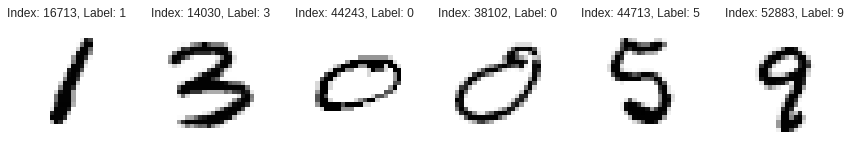

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

* MNIST의 학습용 데이터가 실제 값으로는 어떻게 구성되어있는지 출력을 해보면, y_train의 0번째는 4라는 값이 저장되어 있는걸 알 수 있고, x_train의 0번째에는 숫자 4에 대한 이미지를 0~255 사이의 값으로 표현하고 있음

In [5]:
print(y_train[0])

4


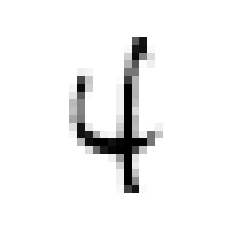

In [6]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

### 전처리
* 간단한 전처리만 사용해서 x_train, x_val 그리고 x_test의 값들을 255로 나누어줍니다. 
* 이미지의 픽셀이 표현하는 값의 범위가 0 ~ 255이기 때문에 최대값인 255로 나누어주면, 값이 0 ~ 1 사이의 범위로 스케일링되어 학습에 용이해집니다.

* y_train, y_val, 그리고 y_test의 경우에는 0부터 9까지의 숫자를 나타내는 레이블이기 때문에 총 10개의 값을 가지는 범주형입니다. 
* utils.to_categorical을 이용해 원-핫 인코딩을 수행합니다. 즉 정답에는 1을, 나머지의 값은 0을 부여합니다.

In [8]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# 원한 인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 모델 구성

* 딥러닝 모델 구성을 위해서 Sequential() 함수를 이용해 순차적으로 레이어를 구성
* MNIST 데이터셋의 숫자 이미지가 28 x 28 사이즈를 사용하므로 입력 객체로 keras.Input를 사용할 때, shape을 (28, 28)로 지정
* 1차원으로 쭉 펼쳐주는 layers.Flatten 레이어를 사용하여 입력 데이터 모양이 2차원인 28 x 28 크기를 1차원으로 784 크기를 갖도록 변형

* 레이어로 layers.Dense를 여러겹 사용하여 유닛수를 100, 64, 32, 10으로 4겹 쌓아주고, 활성화 함수로 relu를 사용
* MNIST의 숫자가 0부터 9까지 총 10개 이므로 마지막 레이어에서는 전체 카테고리의 수인 10을 유닛수로 지정하고, 활성화 함수는 softmax를 사용하여 각 카테고리별 확률 값을 구함






In [11]:
model = models.Sequential()
model.add( keras.Input(shape=(28,28) , name='input' ) )
model.add( layers.Flatten( input_shape=[28, 28], name='flatten') )
model.add( layers.Dense(100, activation='relu', name='dense1'))
model.add( layers.Dense(64, activation='relu', name='dense2') )
model.add( layers.Dense(32, activation='relu', name='dense3') )
model.add( layers.Dense(10, activation='softmax', name='output') )

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


### 모델구성 확인

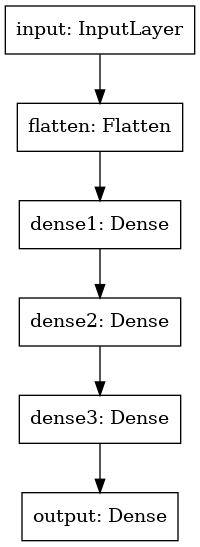

In [12]:
utils.plot_model(model)

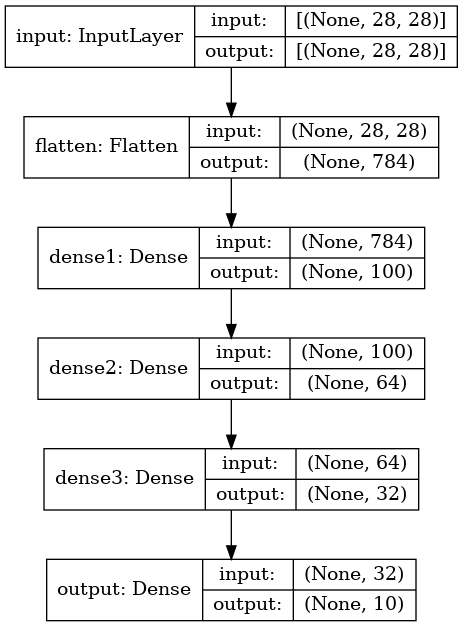

In [13]:
utils.plot_model(model, show_shapes=True)

### 모델 컴파일 및 학습
* 손실함수            : 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용하는 categorical_crossentropy를 지정
* 옵티마이저          : sgd ( 가장 기본적 )
* 분류 성능 확인 지표 : accuracy

In [14]:
model.compile(
    loss='categorical_crossentropy'
    , optimizer='sgd'
    , metrics=['accuracy']
    )

* 딥러닝 모델을 학습하기 위해 fit
* 학습에 사용되는 데이터로 x_train과 y_train을 지정
* 학습을 반복하는 에폭 수(epochs)는 40으로 지정
* 배치 사이즈(batch_size)는 128로 지정
* 검증을 위해서 나누었던 데이터로 x_val와 y_val을 지정

In [15]:
history = model.fit(
    x_train, y_train
    , epochs=50
    , batch_size=128
    , validation_data =(x_val, y_val)
)

Epoch 1/50
329/329 [==============================] - 14s 4ms/step - loss: 1.7965 - accuracy: 0.4425 - val_loss: 1.1470 - val_accuracy: 0.7071
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.8275 - accuracy: 0.7757 - val_loss: 0.6495 - val_accuracy: 0.8152
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.5527 - accuracy: 0.8466 - val_loss: 0.4933 - val_accuracy: 0.8609
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.8815 - val_loss: 0.4146 - val_accuracy: 0.8809
Epoch 5/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3707 - accuracy: 0.8976 - val_loss: 0.3535 - val_accuracy: 0.8983
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.9067 - val_loss: 0.3294 - val_accuracy: 0.9023
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3079 - accuracy: 0.9133 - val_loss: 0.3105 - val_accuracy: 0.9083
Epoch

* 모델이 학습을 진행하면서 각 에폭마다 지표 결과들을 history로 저장 함.
* 저장된 형태를 보면 loss, accuracy, val_loss, val_accuracy로 구분 하여 저장 됨.

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

* history에 저장된 결과 값들이 에폭이 진행되면서 변화되는 추이를 살펴보기 위해서 시각화 함

* 첫 번째 차트에서는 loss와 val_loss를 함께 보여주고, 두 번째 차트에서는 accuracy와 val_accuracy를 함께 보여 줌

In [20]:
import pandas as pd
history_dict = history.history
pd.DataFrame(history_dict).head()

,loss,accuracy,val_loss,val_accuracy
0,1.796467,0.442500,1.147011,0.707056
1,0.827462,0.775667,0.649491,0.815167
2,0.552725,0.846619,0.493280,0.860889
3,0.434887,0.881452,0.414576,0.880944
4,0.370673,0.897571,0.353524,0.898278


In [26]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

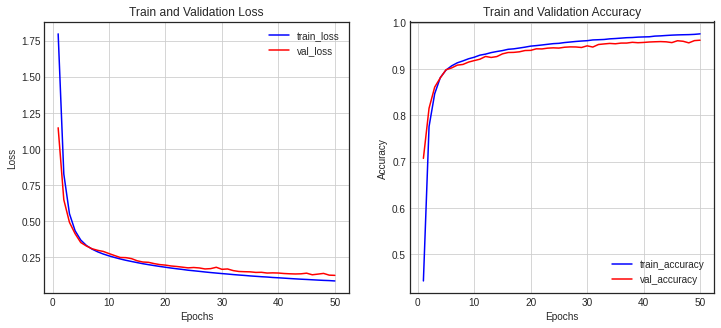

In [27]:
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
* 학습된 모델의 평가를 위해서 x_test와 y_test를 대상으로 evaluate() 함수를 동작

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1169 - accuracy: 0.9641


[0.11694888770580292, 0.9641000032424927]

학습된 모델의 예측을 위해 x_test를 넣고, 그에 대한 예측 결과를 받아서 0번째 결과만 확인을 해보면, 최종 레이어인 유닛 수 10개의 softmax를 활성화 함수로 통과한 결과인 것을 알 수 있습니다.

In [31]:
pred_ys = model.predict(x_test)
print('pred_ys.shape : ', pred_ys.shape)
print('pred_ys_0 : ', pred_ys[0])

pred_ys.shape :  (10000, 10)
pred_ys_0 :  [2.3569082e-06 1.3417302e-06 5.3654885e-04 1.8251586e-03 1.3216133e-07
 3.8728933e-05 1.5080831e-08 9.9749172e-01 1.8876597e-05 8.5133841e-05]


* 결과값 중에서 가장 큰 수가 있는 위치값을 np.argmax()를 통해서 구함
* 예측한 레이블 값 arg_pred_y[0]과 실제 숫자 이미지인 x_test[0]를 출력

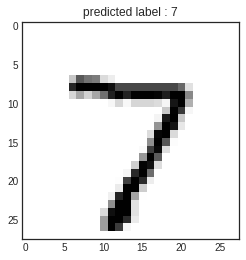

In [32]:
agr_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'predicted label : {agr_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

classification_report를 임포트해서 각종 지표 확인

In [33]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.94      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



각 레이블 별로 분류가 얼마나 잘 수행되었는지 한눈에 살펴볼 수 있도록 혼동 행렬(Confusion Matrix)을 이용해 시각화

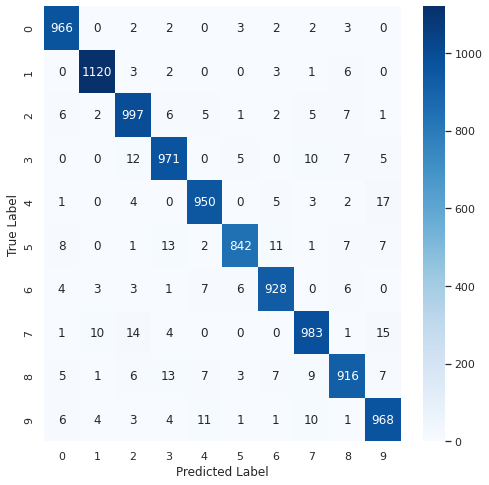

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7-3. 모델 저장과 로드

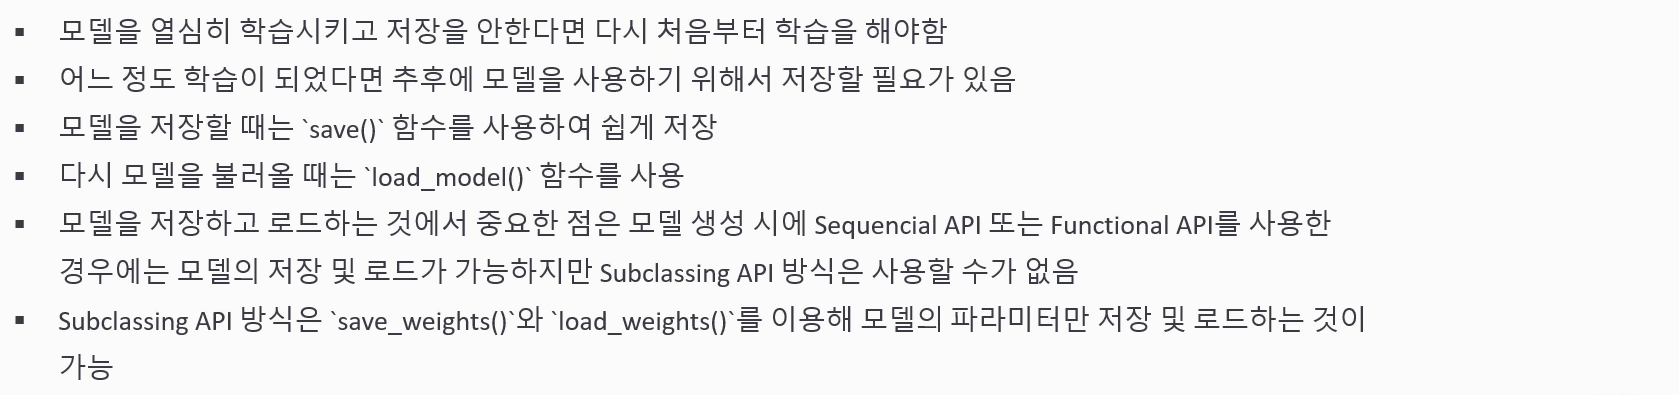

* JSON 형식으로 모델을 저장하려면 to_json()를 사용하여 가능하고, JSON 파일로부터 모델을 로드하려면 model_from_json()을 사용하면 됩니다. 그 밖에도 YAML로 직렬화하여 저장할 경우 to_yaml()를 사용하고, model_from_yaml()를 사용하여 로드하면 됩니다.



* mnist_model.h5 이름으로 파일 저장

In [35]:
model.save('mnist_model.h5')  # 파일로 저장 된 것 확인

* mnist_model.h5라는 이름의 모델을 로드하여 가져 오기.

In [36]:
load_model = models.load_model('mnist_model.h5')
load_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


### 로드한 모델을 이용하여 예측

In [37]:
pred_ys2 = load_model.predict(x_test)
print('pred_ys2.shape : ', pred_ys2.shape)
print('pred_ys2_0 : ', pred_ys2[0])

pred_ys2.shape :  (10000, 10)
pred_ys2_0 :  [2.3569082e-06 1.3417302e-06 5.3654885e-04 1.8251586e-03 1.3216133e-07
 3.8728933e-05 1.5080831e-08 9.9749172e-01 1.8876597e-05 8.5133841e-05]


* 로드한 모델이 예측한 결과값을 시각화

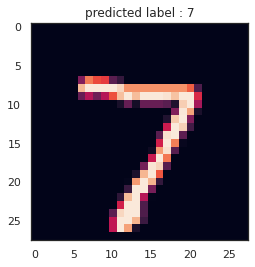

In [39]:
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

plt.title(f'predicted label : {arg_pred_y2[0]}')
plt.imshow(x_test[0])
plt.show()

Q. to_json() 함수를 이용해 모델을 저장해보고 다시 불러서 결과를 확인해보세요. 결과가 같은가요, 다른가요?

In [40]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

(10000, 10)
[0.09850407 0.07269937 0.07956001 0.10109678 0.10339472 0.0948661
 0.13852265 0.10912105 0.11808618 0.08414906]


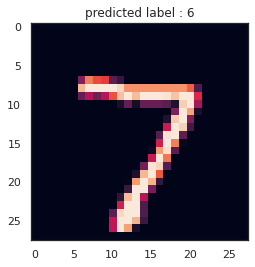

In [41]:
arg_pred_y_json = np.argmax(predictions, axis=1)

plt.title(f'predicted label : {arg_pred_y_json[0]}')
plt.imshow(x_test[0])
plt.show()

# 7-4. 콜백 (Callbacks)

* 모델을 fit() 함수를 통해 학습시키는 동안 callbacks 매개변수를 사용하여 학습 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음
* 콜백의 대표적인 예로는 ModelCheckpoint, EarlyStopping, LearningRateScheduler, Tensorboard가 있음.

In [42]:
from tensorflow.keras import callbacks

### ModelCheckpoint
* tf.keras.callbacks.ModelCheckpoint: 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

In [43]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10, callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0947 - accuracy: 0.9726
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.9742
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0821 - accuracy: 0.9761
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0767 - accuracy: 0.9776
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0705 - accuracy: 0.9795
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0659 - accuracy: 0.9806
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0611 - accuracy: 0.9830
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0569 - accuracy: 0.9841
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0534 - accuracy: 0.9849
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.049

* 최상의 모델만 저장하는 옵션 - save_best_only=True 지정

In [44]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0467 - accuracy: 0.9870 - val_loss: 0.1095 - val_accuracy: 0.9675
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0429 - accuracy: 0.9882 - val_loss: 0.1152 - val_accuracy: 0.9657
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0407 - accuracy: 0.9889 - val_loss: 0.1058 - val_accuracy: 0.9688
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0375 - accuracy: 0.9898 - val_loss: 0.1048 - val_accuracy: 0.9694
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0349 - accuracy: 0.9912 - val_loss: 0.1101 - val_accuracy: 0.9682
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0330 - accuracy: 0.9918 - val_loss: 0.1068 - val_accuracy: 0.9695
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0308 - accuracy: 0.9924 - val_loss: 0.1151 - val_accuracy:

### EarlyStopping
* tf.keras.callbacks.EarlyStopping: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때

일정 patience 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈추게 됩니다. 모델이 향상되지 않으면 학습이 자동으로 중지되므로, epochs 숫자를 크게 해도 무방합니다. 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요가 없습니다.

In [45]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0235 - accuracy: 0.9945 - val_loss: 0.1093 - val_accuracy: 0.9704
Epoch 2/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0212 - accuracy: 0.9951 - val_loss: 0.1091 - val_accuracy: 0.9699
Epoch 3/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0205 - accuracy: 0.9951 - val_loss: 0.1114 - val_accuracy: 0.9697
Epoch 4/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0179 - accuracy: 0.9961 - val_loss: 0.1129 - val_accuracy: 0.9699
Epoch 5/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0172 - accuracy: 0.9963 - val_loss: 0.1178 - val_accuracy: 0.9687


### LearningRateScheduler
* tf.keras.callbacks.LearningRateSchduler: 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용
* 에폭 수가 10 미만일 경우는 학습률을 그대로 하고, 10 이상이 되면 -0.1%씩 감소시키는 코드

In [46]:
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)
# end of def

In [48]:
round(model.optimizer.lr.numpy(), 5)  # lr  -> learning Rate

0.01

In [49]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

### Tensorboard
* tf.keras.callbacks.TensorBoard: 모델의 경과를 모니터링할 때

* 텐서보드를 이용하여 학습과정을 모니터링하기 위해서는 logs 폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성합니다. 

------------------------
* 아래 코드를 지금 여러분이 웹을 통해 이용하고 있는 LMS 컨테이너 내부에서 동작시킬 경우 결과가 보이지 않을 수 있습니다.

로컬PC나 colab 등의 환경에서 위의 코드를 그대로 구동해 봅시다.

로컬PC나 colab 등의 환경에서 위의 코드를 그대로 구동한다면 다음과 같은 tensorboard 결과를 확인하실 수 있습니다.

In [50]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0059 - accuracy: 0.9997 - val_loss: 0.1179 - val_accuracy: 0.9705
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0056 - accuracy: 0.9997 - val_loss: 0.1194 - val_accuracy: 0.9704
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0055 - accuracy: 0.9998 - val_loss: 0.1215 - val_accuracy: 0.9708
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0052 - accuracy: 0.9998 - val_loss: 0.1202 - val_accuracy: 0.9711
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0051 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9704
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0048 - accuracy: 0.9999 - val_loss: 0.1202 - val_accuracy: 0.9706
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0047 - accuracy: 0.9999 - val_loss: 0.1219 - val_accuracy:

In [52]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 820), started 0:00:30 ago. (Use '!kill 820' to kill it.)